### 1. Simple example of k-means clustering

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


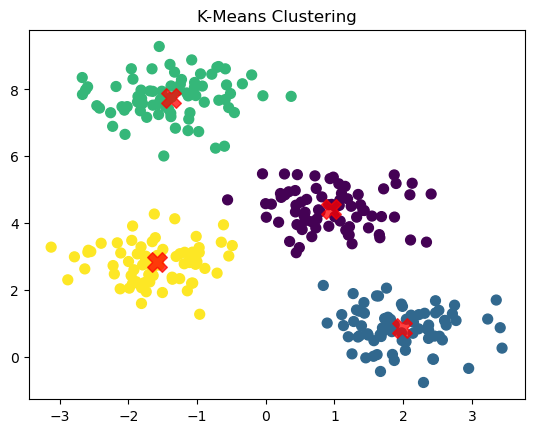

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Create dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# kmeans.labels_  -----> Labeling each data point under a cluster

# Step 3: Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()


### 2. How to save the trained model using pickle

In [22]:
import pickle

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# 'wb' = write binary mode
# 'kmeans_model.pkl' is the filename
# pickle.dump() saves the model

### 3. How to load the model later

In [25]:
# Load the model from the file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)

# 'rb' = read binary mode
# pickle.load() loads the model back into memory

### 4. How to predict for new dataset using trained model

In [28]:
# Step 4: Create a new dataset (new points to predict)
new_points = np.array([
    [0, 2],
    [5, 8],
    [1, 0],
    [-1, 4],
    [7, 3]
])

# Predict the cluster labels for new points
# predicted_labels = kmeans.predict(new_points)
predicted_labels = loaded_kmeans.predict(new_points) # If the model was saved

print("Predicted cluster labels for new points:", predicted_labels)


Predicted cluster labels for new points: [3 0 1 3 1]


### 5. How to choose the best k (number of clusters) using the Elbow Method

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

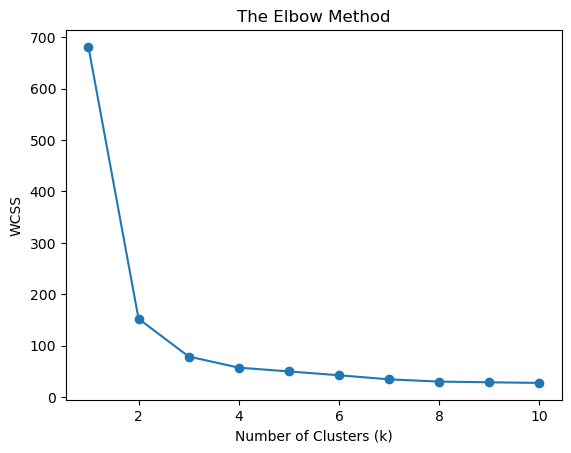

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the data
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Elbow Method
wcss = []  # To store Within-Cluster Sum of Squares

# Try k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0) 
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # inertia_ gives the Within-Cluster Sum of Squares (WCSS)

# Plot k vs WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

### 6. Limitations of K-Means